<a href="https://colab.research.google.com/github/ambikad04/Pandas/blob/main/PandasFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
delivery=pd.read_csv('/content/deliveries.csv')

In [ ]:
matches=pd.read_csv('/content/matches - matches.csv')

## **Marge Function in Pandas**

In [ ]:
# Merge
new =delivery.merge(matches,left_on='match_id', right_on='id')

In [ ]:
print(delivery.shape)
print(matches.shape)

(92149, 21)
(636, 18)


In [ ]:
new.groupby('batsman')['batsman_runs'].sum()

,batsman_runs
batsman,
A Ashish Reddy,56.0
A Chandila,0.0
A Chopra,53.0
A Choudhary,25.0
A Flintoff,62.0
...,...
YV Takawale,88.0
Yashpal Singh,47.0
Younis Khan,3.0


In [ ]:
new.groupby(['season','batsman'])['batsman_runs'].sum()

season  batsman          
2008    A Chopra              42.0
        A Kumble              13.0
        A Mishra              37.0
        A Mukund               0.0
        A Nehra                3.0
                             ...  
2017    Washington Sundar      9.0
        YK Pathan            143.0
        YS Chahal             13.0
        Yuvraj Singh         252.0
        Z Khan                 4.0
Name: batsman_runs, Length: 1046, dtype: float64

In [ ]:
new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(
    subset='season',keep='first').sort_values('season')[['season','batsman']]

,season,batsman
3,2008,SE Marsh
7,2009,ML Hayden
2,2010,SR Tendulkar
4,2011,CH Gayle
0,2012,CH Gayle
348,2013,CH Gayle
1,2017,DA Warner


## **Pivot Table in IPL Analysis**

In [ ]:
mask=delivery['batsman_runs']==6
six=delivery[mask]
six.shape

(3844, 21)

In [ ]:
pt=six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

In [ ]:
import seaborn as sns

<Axes: xlabel='batting_team', ylabel='over'>

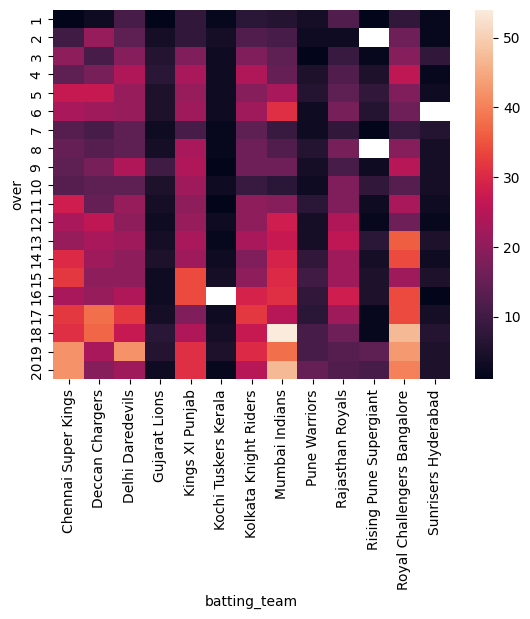

In [ ]:
sns.heatmap(pt)

## **Corr Function in Pandas**

In [ ]:
matches.select_dtypes(include='number').corr()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
id,1.000000,0.471087,0.024281,-0.010263,-0.015510,NaN
season,0.471087,1.000000,0.004170,-0.016815,-0.000708,NaN
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640,NaN
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181,NaN
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000,NaN
umpire3,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

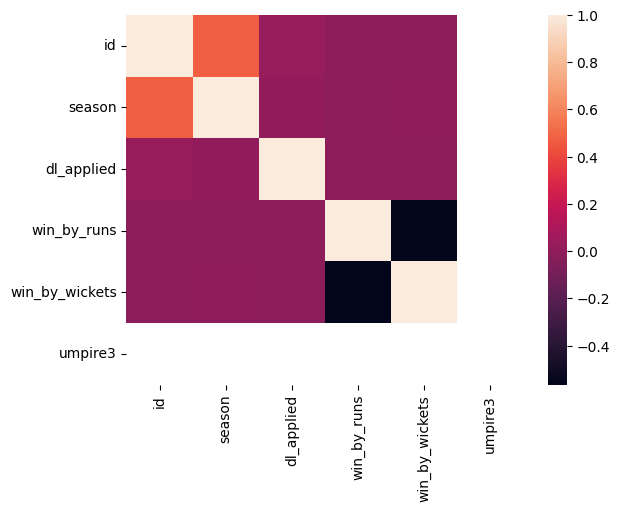

In [ ]:
sns.heatmap(matches.select_dtypes(include='number').corr())

## **Rename Columns in Pandas**

In [ ]:
matches.rename(columns={'city':'place','date':'dom'})
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


## **Uses of 'set_index()' and 'reset_index()'**

In [ ]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.set_index('id', inplace=True)

In [ ]:
matches.reset_index(inplace=True)

In [ ]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
matches['winner'].value_counts().reset_index()

,winner,count
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


# **Handeling Missing Values**

In [32]:
data=pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **1. Dropping missing data using 'dropna()'**

In [33]:
data.shap

(891, 12)

In [35]:
data.dropna().shape

(183, 12)

In [37]:
data.dropna(how='all').shape

(891, 12)

In [40]:
data.dropna(axis=1, how='all').shape

(891, 12)

In [45]:
data.dropna(subset=['Cabin','Embarked']).shape

(202, 12)

## **2. Filling missing values using 'fillna()'**

In [46]:
data.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
data['Cabin'].fillna("Not Specified")

,Cabin
0,Not Specified
1,C85
2,Not Specified
3,C123
4,Not Specified
...,...
886,Not Specified
887,B42
888,Not Specified
889,C148


In [ ]:
data['Age'].fillna(30)

In [50]:
data['Age'].fillna(method='bfill')

<ipython-input-50-af9d4bebbcea>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Age'].fillna(method='bfill')


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,26.0
889,26.0
